/Users/jordenroderique/Desktop/HIT140-Assignment-3/analysis/jorden


([<matplotlib.axis.XTick at 0x329f23390>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

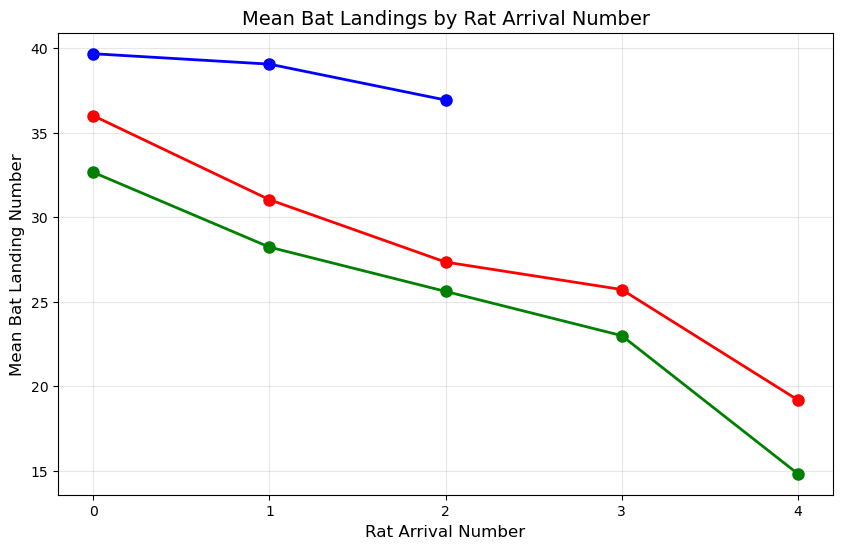

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

cwd = os.getcwd()
print(cwd)
ds2_path = '../../datasets/cleaned/cleaned_dataset2_seasons.csv'

df = pd.read_csv(os.path.join(cwd, ds2_path))
lower_percentile = df['food_availability'].quantile(0.1)
df = df[df['food_availability'] >= lower_percentile]
df = df[df['rat_arrival_number'] <= 4]
df_winter = df[df['season'] == 0]
df_winter = df_winter[df_winter['rat_arrival_number'] <= 2]
df_spring = df[df['season'] == 1]

mean_by_group_total = df.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()
mean_by_group_winter = df_winter.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()
mean_by_group_spring = df_spring.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(mean_by_group_total['rat_arrival_number'], mean_by_group_total['bat_landing_number'],
         marker='o', linewidth=2, markersize=8, color='red')
plt.title('Mean Bat Landings by Rat Arrival Number', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Mean Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(5))

plt.plot(mean_by_group_winter['rat_arrival_number'], mean_by_group_winter['bat_landing_number'],
         marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Mean Bat Landings by Rat Arrival Number', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Mean Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(5))

plt.plot(mean_by_group_spring['rat_arrival_number'], mean_by_group_spring['bat_landing_number'],
         marker='o', linewidth=2, markersize=8, color='green')
plt.title('Mean Bat Landings by Rat Arrival Number', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Mean Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(5))

/Users/jordenroderique/Desktop/HIT140-Assignment-3/analysis/jorden


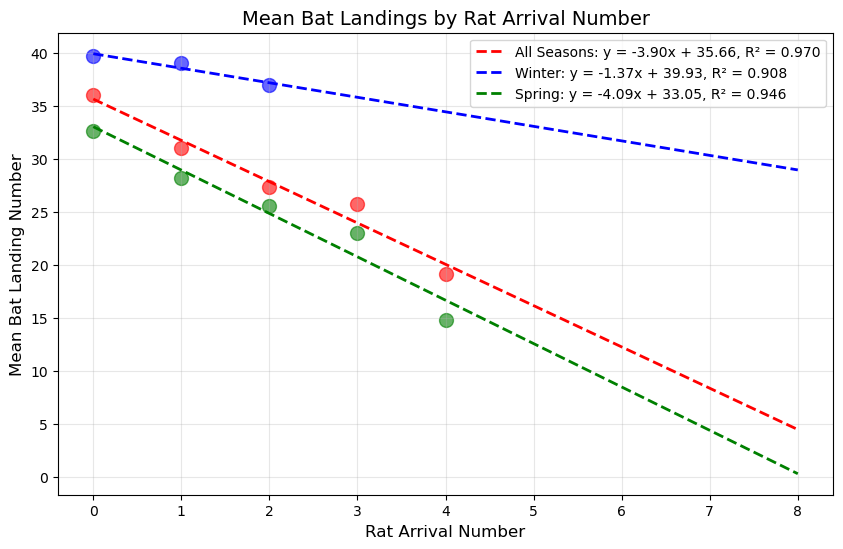

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

cwd = os.getcwd()
print(cwd)
ds2_path = '../../datasets/cleaned/cleaned_dataset2_seasons.csv'

df = pd.read_csv(os.path.join(cwd, ds2_path))
lower_percentile = df['food_availability'].quantile(0.1)
df = df[df['food_availability'] >= lower_percentile]
df = df[df['rat_arrival_number'] <= 4]
df_winter = df[df['season'] == 0]
df_winter = df_winter[df_winter['rat_arrival_number'] <= 2]
df_spring = df[df['season'] == 1]

mean_by_group_total = df.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()
mean_by_group_winter = df_winter.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()
mean_by_group_spring = df_spring.groupby('rat_arrival_number')['bat_landing_number'].mean().reset_index()

plt.figure(figsize=(10, 6))

x_total = mean_by_group_total['rat_arrival_number'].values
y_total = mean_by_group_total['bat_landing_number'].values
plt.scatter(x_total, y_total, s=100, color='red', alpha=0.6)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_total, y_total)
x_extended = np.linspace(0, 8, 100)
y_pred = slope * x_extended + intercept
plt.plot(x_extended, y_pred, '--', linewidth=2, color='red',
         label=f'All Seasons: y = {slope:.2f}x + {intercept:.2f}, R² = {r_value**2:.3f}')

x_winter = mean_by_group_winter['rat_arrival_number'].values
y_winter = mean_by_group_winter['bat_landing_number'].values
plt.scatter(x_winter, y_winter, s=100, color='blue', alpha=0.6)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_winter, y_winter)
y_pred = slope * x_extended + intercept
plt.plot(x_extended, y_pred, '--', linewidth=2, color='blue',
         label=f'Winter: y = {slope:.2f}x + {intercept:.2f}, R² = {r_value**2:.3f}')

x_spring = mean_by_group_spring['rat_arrival_number'].values
y_spring = mean_by_group_spring['bat_landing_number'].values
plt.scatter(x_spring, y_spring, s=100, color='green', alpha=0.6)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_spring, y_spring)
y_pred = slope * x_extended + intercept
plt.plot(x_extended, y_pred, '--', linewidth=2, color='green',
         label=f'Spring: y = {slope:.2f}x + {intercept:.2f}, R² = {r_value**2:.3f}')

plt.title('Mean Bat Landings by Rat Arrival Number', fontsize=14)
plt.xlabel('Rat Arrival Number', fontsize=12)
plt.ylabel('Mean Bat Landing Number', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(9))
plt.legend()
plt.show()